In [2]:
import requests
import json
import spotipy
import spotipy.oauth2 as oauth2
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import aws_config
import mysql.connector
from tqdm import tqdm
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import scipy.stats as stats

In [308]:
cnx = mysql.connector.connect(
    host = aws_config.host,
    user = aws_config.user,
    password = aws_config.passwd)


# create cursor object
c = cnx.cursor()
cnx.database = 'spotify'

In [7]:
client_id = 'da2369703a6e4f2b83ed59a65455ea2d'
client_secret = 'b72ce17bf2374b8295ebe6f5f54d4b88'


credentials = spotipy.oauth2.SpotifyClientCredentials('da2369703a6e4f2b83ed59a65455ea2d', client_secret = 'b72ce17bf2374b8295ebe6f5f54d4b88')
spotify = spotipy.Spotify(client_credentials_manager=credentials)
spotify.audio_features(['4uLU6hMCjMI75M1A2tKUQC'])

[{'danceability': 0.721,
  'energy': 0.939,
  'key': 8,
  'loudness': -11.823,
  'mode': 1,
  'speechiness': 0.0376,
  'acousticness': 0.115,
  'instrumentalness': 3.79e-05,
  'liveness': 0.108,
  'valence': 0.914,
  'tempo': 113.309,
  'type': 'audio_features',
  'id': '4uLU6hMCjMI75M1A2tKUQC',
  'uri': 'spotify:track:4uLU6hMCjMI75M1A2tKUQC',
  'track_href': 'https://api.spotify.com/v1/tracks/4uLU6hMCjMI75M1A2tKUQC',
  'analysis_url': 'https://api.spotify.com/v1/audio-analysis/4uLU6hMCjMI75M1A2tKUQC',
  'duration_ms': 213573,
  'time_signature': 4}]

In [5]:
spotify.audio_analysis('69DYNMcu7Bq8EAm2GwbDHK'))

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

In [2]:
artists =  ['NOTD',
 'Zacari',
 'Alesso',
 'LX',
 'Shakira',
 'Marc Anthony',
 'Lukas Graham',
 'PNL',
 'Mahmood',
 'Nekfeu',
 'Chris Brown',
 'Stan Kenton',
 'JENNIE',
 'Farid Bang',
 'MØ',
 'Paul McCartney',
 'Kungs',
 '5 Seconds of Summer',
 'Tropijazz',
 'Wisin & Yandel',
 'Loud Luxury',
 '21 Savage',
 'Dimitri Vegas & Like Mike',
 'Jason Derulo',
 'JAY-Z',
 'Trippie Redd',
 'Regard',
 'Huncho Jack',
 'Chance the Rapper',
 'CNCO',
 'Lunay',
 'Nevada',
 'Luke Christopher',
 'The Beach Boys',
 'Ant Saunders',
 'Skrillex',
 'The Black Eyed Peas',
 'Daryl Hall & John Oates',
 'Gunna',
 'James Bay',
 'Rob $tone',
 'Hozier',
 'Cosculluela',
 'Ramz',
 'Aaron Carter',
 'Tee Grizzley',
 'José Feliciano',
 'A$AP Ferg',
 'Leslie Grace',
 'Harry Styles',
 'Sia',
 'YG',
 'Sido',
 'Thirty Seconds To Mars',
 'Perry Como',
 'Michael Bublé',
 'Luche',
 'Macklemore',
 'Khea',
 'Earth, Wind & Fire',
 'Marília Mendonça',
 'Ayo & Teo',
 'DRAM',
 'Lil Uzi Vert',
 'Kalazh44',
 'Madison Beer',
 'Dadá Boladão',
 'N.E.R.D',
 'Ariana Grande',
 'Kris Kross Amsterdam',
 'Frank Sinatra',
 'Jon Bellion',
 'Andy Grammer',
 'Flume',
 "Why Don't We",
 'Naomi Scott',
 'XXXTENTACION',
 'Ufo361',
 'DVBBS',
 'Mabel',
 'Sam Smith',
 'Lil Tecca',
 'Ella Mai',
 'The Script',
 'Taylor Swift',
 '6LACK',
 'Rick Ross',
 'Isaiah',
 'Rihanna',
 'Khalid',
 'Irama',
 'Elton John',
 'Pitbull',
 'Ella Fitzgerald',
 'Natti Natasha',
 'Tay-K',
 'Mike Posner',
 'Saweetie',
 'MC MM',
 'Donny Hathaway',
 'Iggy Azalea',
 'Marracash',
 'Swae Lee',
 'KALEO',
 'Dominic Fike',
 'Queen',
 'Ghali',
 'Capital Bra',
 'Guaynaa',
 'j-hope',
 'Alex Rose',
 'ChocQuibTown',
 'Charlie Charles',
 'Avicii',
 'VÉRITÉ',
 'Jax Jones',
 'Macklemore & Ryan Lewis',
 'FLETCHER',
 'Avril Lavigne',
 'Lewis Capaldi',
 'Y2K',
 'Blanco Brown',
 'Peter Manos',
 'Idina Menzel',
 'NAV',
 'Galantis',
 'Camilo',
 'Nicky Jam',
 'Lil Tjay',
 'Dan + Shay',
 'Maggie Lindemann',
 'Tom Petty',
 'Drake',
 'Moon Taxi',
 'David Guetta',
 'Billie Eilish',
 'Zac Efron',
 'Céline Dion',
 'James Arthur',
 'Seeb',
 'PARTYNEXTDOOR',
 'Ray Parker, Jr.',
 'Dynoro',
 'Chino & Nacho',
 'Cali Y El Dandee',
 'Don Patricio',
 'The Cratez',
 'Hailee Steinfeld',
 'Fifth Harmony',
 'Lil Xan',
 'Alvaro Soler',
 'DaBaby',
 '*NSYNC',
 'Kevin Roldan',
 'Wham!',
 'Julia Michaels',
 'Lorde',
 'Nimo',
 'Axwell /\\ Ingrosso',
 'Ed Sheeran',
 'DNCE',
 'A R I Z O N A',
 'Piso 21',
 'JP Saxe',
 'Tones and I',
 'ItaloBrothers',
 'J. Cole',
 'KREAM',
 'Darlene Love',
 'Slipknot',
 'Lean Trap',
 'Keala Settle',
 'Sofia Reyes',
 'Don Khuma',
 'Sebastian Yatra',
 'Calum Scott',
 'Luis Fonsi',
 'Kontra K',
 'Dermot Kennedy',
 'Travis Scott',
 'Zedd',
 'Hugh Jackman',
 'Anuel AA',
 'Kendrick Lamar',
 'Wolfine',
 'Lil Yachty',
 'Dardan',
 'Ozuna',
 'G-Eazy',
 'Tyler, The Creator',
 'Chris Rea',
 'Solange',
 'Maluma',
 'Playboi Carti',
 'Takeoff',
 'Sfera Ebbasta',
 'Dayvi',
 'Ricky Martin',
 'Wisin',
 'Calboy',
 'Matheus & Kauan',
 'Alan Walker',
 'Ty Dolla $ign',
 'Jennifer Lopez',
 'EXO',
 'Kesha',
 'Starley',
 'gnash',
 'Alessia Cara',
 'Boney M.',
 'MERO',
 'Noah Cyrus',
 'Lil Wayne',
 'Russ',
 'Florence + The Machine',
 'Hearts & Colors',
 'Flipp Dinero',
 'KSI',
 'The Carters',
 'Luciano',
 'Joey Montana',
 'Mustard',
 '187 Strassenbande',
 'Jay Rock',
 'Childish Gambino',
 'Lana Del Rey',
 'Petit Biscuit',
 'Bebe Rexha',
 'Dj Kass',
 'Gesaffelstein',
 'Ab-Soul',
 'Kane Brown',
 'MEDUZA',
 'Anita Kerr Singers',
 'Michelle Williams',
 'Alok',
 'ScHoolboy Q',
 'IAmChino',
 'Maite Perroni',
 'Migos',
 'Aretha Franklin',
 'Jesse & Joy',
 'Eartha Kitt',
 'Poo Bear',
 'DJ Luian',
 'Romeo Santos',
 'RIN',
 'Kiiara',
 'The Jackson 5',
 'Charli XCX',
 'Ashley O',
 'Bizarrap',
 'Internet Money',
 'OutKast',
 'Bonez MC',
 'Leona Lewis',
 'Tyga',
 'Arctic Monkeys',
 'Dean Martin',
 'Apache 207',
 'Beyoncé',
 'H.E.R.',
 'Charly Black',
 'NEIKED',
 'Duki',
 'Bryant Myers',
 'Jess Glynne',
 'Lizzo',
 'Gaullin',
 'Farruko',
 'Bruce Springsteen',
 'Mariah Carey',
 'Justin Timberlake',
 'Miley Cyrus',
 'Banx & Ranx',
 'Lil Baby',
 'Cash Cash',
 'Abraham Mateo',
 'Kylie Minogue',
 'The Police',
 'Zay Hilfigerrr',
 'Tropkillaz',
 'Mark Ronson',
 'BTS',
 'Juan Magán',
 'Tiësto',
 'ZAYN',
 'Justin Quiles',
 'The 1975',
 'Quavo',
 'Dalex',
 'Jhay Cortez',
 'SHAED',
 'Mac Miller',
 'Gucci Mane',
 'Andy Williams',
 'Mau y Ricky',
 'Katy Perry',
 'Reynmen',
 'Ski Mask The Slump God',
 'Nas',
 'Metro Boomin',
 'TOMORROW X TOGETHER',
 'The Vamps',
 'Young M.A',
 'Oasis',
 'Cauty',
 'Calvin Harris',
 'Street Rappers',
 'Azet',
 'MC G15',
 'J Balvin',
 'Years & Years',
 'Blue Ivy',
 'Lady Gaga',
 'Burak Yeter',
 'Stormzy',
 'Juju',
 'Daddy Yankee',
 'SuperM',
 'Dean Lewis',
 'Red Velvet',
 'Liam Payne',
 'Joji',
 'Imagine Dragons',
 'The Rudeboyz',
 'Lord Huron',
 'Rudimental',
 'Brytiago',
 'Joey Bada$$',
 'tha Supreme',
 'benny blanco',
 'Rammstein',
 'Niall Horan',
 'Arizona Zervas',
 'Kygo',
 'Frank Ocean',
 'Social House',
 'Coldplay',
 'Cashmere Cat',
 'KC Rebell',
 'Tame Impala',
 'P!nk',
 'Shirin David',
 'Rauw Alejandro',
 'Astrid S',
 'Gradur',
 'Jason Mraz',
 'Vince Staples',
 'Zara Larsson',
 'BlocBoy JB',
 'Gwen Stefani',
 'Gabriel Diniz',
 'Mason Ramsey',
 'Meek Mill',
 'Thalía',
 'Yandel',
 'Halsey',
 'Thomas Rhett',
 'Residente',
 'Nause',
 'KitschKrieg',
 'Gene Autry',
 'Cardi B',
 'Post Malone',
 'Smokepurpp',
 'Sech',
 'Offset',
 'YNW Melly',
 'PnB Rock',
 '2 Chainz',
 'Salmo',
 'Foster The People',
 'Band Aid',
 'Ofenbach',
 'Wiz Khalifa',
 'SOB X RBE',
 'KAROL G',
 'Paulo Londra',
 'Grey',
 'Journey',
 'John Legend',
 'TWICE',
 'Felipe Araújo',
 'Eleni Foureira',
 'Tove Lo',
 'Paloma Mami',
 'MC Kevin o Chris',
 'Shindy',
 'Kehlani',
 'Bobby Helms',
 'Don Toliver',
 'George Michael',
 'Vice',
 '22 Savage',
 'Bing Crosby',
 'King Princess',
 'Jeremy Zucker',
 'Portugal. The Man',
 'Lil Peep',
 'Capo Plaza',
 'Netta',
 'Reik',
 'Michael Jackson',
 'NF',
 'Nick Jonas',
 'Young Thug',
 'Normani',
 'Nat King Cole',
 'Camila Cabello',
 'Future',
 'DJ Snake',
 'Doja Cat',
 'DJ Khaled',
 'Nio Garcia',
 'A$AP Rocky',
 'Robin Schulz',
 'Sigala',
 'BROCKHAMPTON',
 'JP Cooper',
 'Murda',
 '24kGoldn',
 'Ultimo',
 'Veysel',
 'Thomas Gold',
 'Kodak Black',
 'C. Tangana',
 'Chris Jeday',
 'Adele',
 'TOTO',
 'Aminé',
 'Roddy Ricch',
 'Charlie Puth',
 'Sean Paul',
 'Anne-Marie',
 'Troye Sivan',
 'Maren Morris',
 'Manuel Turizo',
 'Major Lazer',
 'AJR',
 'Ninho',
 'Stanaj',
 'Sam Feldt',
 'Bazzi',
 'Rich The Kid',
 'Mozzy',
 'Silk City',
 'GASHI',
 'Dreamville',
 'Sheck Wes',
 'AC/DC',
 'Paramore',
 'The Weeknd',
 'Passenger',
 'Rich Music LTD',
 'Rvssian',
 'Marc E. Bassy',
 'Tainy',
 'La La Land Cast',
 'Bruno Mars',
 'The Pogues',
 'MC Kevinho',
 'Nacho',
 'Flo Rida',
 'YUNGBLUD',
 'Train',
 'Dennis DJ',
 'Pedro Capó',
 'Desiigner',
 'Brenda Lee',
 'Chuck Berry',
 'Ava Max',
 'OneRepublic',
 'Becky G',
 'Steve Aoki',
 'Louis The Child',
 'The xx',
 'Ziv Zaifman',
 'WOS',
 'Danny Ocean',
 'Stargate',
 'Lil Pump',
 'DJ A1',
 'Enrique Iglesias',
 'Aitana',
 'Mumford & Sons',
 'Famous Dex',
 'Kanye West',
 'Ryan Gosling',
 'Little Mix',
 'Machine Gun Kelly',
 'MC L da Vinte',
 'Shawn Mendes',
 'Nipsey Hussle',
 'Kina',
 'Gambi',
 'Gryffin',
 'Pusha T',
 'Matt Terry',
 'Elvis Presley',
 'Britney Spears',
 'RAF Camora',
 'YBN Cordae',
 'Olivia Holt',
 'Demi Lovato',
 'Judy Garland',
 'The Cranberries',
 'Dua Lipa',
 "Shakin' Stevens",
 "MC's Jhowzinho & Kadinho",
 'MiC LOWRY',
 'The Killers',
 'San Holo',
 'Blueface',
 'Loredana',
 'Vince Guaraldi Trio',
 'Joyner Lucas',
 'Twenty One Pilots',
 'Stevie Wonder',
 'ROSALÍA',
 'Big Sean',
 'True Damage',
 'MC Fioti',
 'French Montana',
 'Eno',
 'Mike Perry',
 'Omar Montes',
 'Amenazzy',
 'Gemitaiz',
 'Anderson .Paak',
 'Snakehips',
 'Rae Sremmurd',
 'Marshmello',
 'Tony Bennett',
 'Mambo Kingz',
 'Fero47',
 'Joakim Lundell',
 'Trío Los Josefinos',
 'Polo G',
 'DJ Jonathan',
 'Eminem',
 'Frenna',
 'TINI',
 'Don Omar',
 'Riton',
 'Bag Raiders',
 'Loren Allred',
 'Miguel',
 'Noriel',
 'James Hersey',
 'Panic! At The Disco',
 'Juice WRLD',
 'Mykola Dmytrovych Leontovych',
 'Daya',
 'Maroon 5',
 'Anitta',
 'Ali Gatie',
 'Sabrina Carpenter',
 'Sam Hunt',
 'Tom Walker',
 'KIDS SEE GHOSTS',
 'Bausa',
 'YBN Nahmir',
 'The Chainsmokers',
 'Cheat Codes',
 '6ix9ine',
 'Lauv',
 'Sage The Gemini',
 'Henrique & Juliano',
 'John Mayer',
 'NLE Choppa',
 'blackbear',
 'SZA',
 'Alex Sensation',
 'Prince Royce',
 'Ellie Goulding',
 'Summer Walker',
 'Labrinth',
 'Phil Spector',
 'Justin Bieber',
 'Myke Towers',
 'MACHETE',
 'Yo Gotti',
 'Mura Masa',
 'Rita Ora',
 'FRENSHIP',
 'Dennis Lloyd',
 'A Boogie Wit da Hoodie',
 'Bad Bunny',
 'Boef',
 'Carnage',
 'Armin van Buuren',
 'Zion & Lennox',
 'Lil Mosey',
 'Bushido',
 'Alec Benjamin',
 'Aaron Smith',
 'Tory Lanez',
 'Samra',
 'Norm Ender',
 'Márcia Fellipe',
 'Marian Hill',
 'James Blake',
 'Lil Nas X',
 'George Ezra',
 'Big Shaq',
 'SAINt JHN',
 'Dimelo Flow',
 'Bryce Vine',
 'K/DA',
 'Brett Eldredge',
 'Meghan Trainor',
 'Martin Jensen',
 'Jonas Blue',
 'Pentatonix',
 'Felix Jaehn',
 'BLACKPINK',
 'KYLE',
 'Paul Rosenberg',
 'Gorillaz',
 'The Ronettes',
 'Nicki Minaj',
 'Quality Control',
 'Dante Klein',
 'Milky Chance',
 'Lele Pons',
 'Bomba Estéreo',
 'Zé Neto & Cristiano',
 'Trevor Daniel',
 'Clean Bandit',
 'Jorja Smith',
 'De La Ghetto',
 'Summer Cem',
 'Joel Adams',
 'LANY',
 'Duncan Laurence',
 'Carlos Vives',
 'Fall Out Boy',
 'MC Loma e As Gêmeas Lacração',
 'John Lennon',
 'Lil Skies',
 'Louis Tomlinson',
 'Megan Thee Stallion',
 'Kelly Clarkson',
 'YoungBoy Never Broke Again',
 'Jonas Brothers',
 'Linkin Park',
 'State of Sound',
 'Pharrell Williams',
 'Logic',
 'Shawn Hook',
 'Selena Gomez',
 "Rag'n'Bone Man",
 'Burl Ives',
 'Martin Garrix',
 'Lil Dicky',
 'MAX',
 'Diplo',
 'R3HAB',
 'Florida Georgia Line']

### Artist API calls

In [1]:
def get_artist_info(list_of_artists):
    """Takes a list of artists and makes spotify API call"""
    results = []
    for artist in list_of_artists:
        results.append(spotify.search(q=f'{artist}', type="artist", limit=1))
    return results

In [23]:
artist_output = get_artist_info(artists)

In [21]:
get_artist_info(artists)

[{'artists': {'href': 'https://api.spotify.com/v1/search?query=NOTD&type=artist&offset=0&limit=1',
   'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5jAMCwdNHWr7JThxtMuEyy'},
     'followers': {'href': None, 'total': 95423},
     'genres': ['dance pop',
      'edm',
      'electro house',
      'electropop',
      'pop',
      'pop edm',
      'post-teen pop',
      'tropical house'],
     'href': 'https://api.spotify.com/v1/artists/5jAMCwdNHWr7JThxtMuEyy',
     'id': '5jAMCwdNHWr7JThxtMuEyy',
     'images': [{'height': 640,
       'url': 'https://i.scdn.co/image/20eef23c4d2d3e4f159ac9a430d02fc81a106d2f',
       'width': 640},
      {'height': 320,
       'url': 'https://i.scdn.co/image/282392f320ff62d64f542f161b322f83dcfa8b91',
       'width': 320},
      {'height': 160,
       'url': 'https://i.scdn.co/image/3bf577d7f97e73f9b9f64ea662e624cae28ad5e9',
       'width': 160}],
     'name': 'NOTD',
     'popularity': 76,
     'type': 'artist',
     'uri': 'spotif

In [60]:
len(artist_output)

660

In [341]:
new_artists[:5]

[{'href': 'https://api.spotify.com/v1/search?query=NOTD&type=artist&offset=0&limit=1',
  'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5jAMCwdNHWr7JThxtMuEyy'},
    'followers': {'href': None, 'total': 94694},
    'genres': ['dance pop',
     'edm',
     'electro house',
     'electropop',
     'pop',
     'pop edm',
     'post-teen pop',
     'tropical house'],
    'href': 'https://api.spotify.com/v1/artists/5jAMCwdNHWr7JThxtMuEyy',
    'id': '5jAMCwdNHWr7JThxtMuEyy',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/20eef23c4d2d3e4f159ac9a430d02fc81a106d2f',
      'width': 640},
     {'height': 320,
      'url': 'https://i.scdn.co/image/282392f320ff62d64f542f161b322f83dcfa8b91',
      'width': 320},
     {'height': 160,
      'url': 'https://i.scdn.co/image/3bf577d7f97e73f9b9f64ea662e624cae28ad5e9',
      'width': 160}],
    'name': 'NOTD',
    'popularity': 76,
    'type': 'artist',
    'uri': 'spotify:artist:5jAMCwdNHWr7JThxtMuEyy'}],
 

In [62]:
artists = parse_artists(artist_output)
len(artists)

658

In [63]:
artists[:4]

[{'external_urls': {'spotify': 'https://open.spotify.com/artist/5jAMCwdNHWr7JThxtMuEyy'},
  'followers': {'href': None, 'total': 95423},
  'genres': ['dance pop',
   'edm',
   'electro house',
   'electropop',
   'pop',
   'pop edm',
   'post-teen pop',
   'tropical house'],
  'href': 'https://api.spotify.com/v1/artists/5jAMCwdNHWr7JThxtMuEyy',
  'id': '5jAMCwdNHWr7JThxtMuEyy',
  'images': [{'height': 640,
    'url': 'https://i.scdn.co/image/20eef23c4d2d3e4f159ac9a430d02fc81a106d2f',
    'width': 640},
   {'height': 320,
    'url': 'https://i.scdn.co/image/282392f320ff62d64f542f161b322f83dcfa8b91',
    'width': 320},
   {'height': 160,
    'url': 'https://i.scdn.co/image/3bf577d7f97e73f9b9f64ea662e624cae28ad5e9',
    'width': 160}],
  'name': 'NOTD',
  'popularity': 76,
  'type': 'artist',
  'uri': 'spotify:artist:5jAMCwdNHWr7JThxtMuEyy'},
 {'external_urls': {'spotify': 'https://open.spotify.com/artist/3qBKjEOanahMxlRojwCzhI'},
  'followers': {'href': None, 'total': 48140},
  'genres':

### Artist Parsing


In [67]:
def parse_artists(artists):
    """Takes json return and selects id, name, popularity, and followers"""
    new_artists = []
    parsed_list = []
    for item in artists:
        new_artists.append(item['artists'])
    for items in new_artists:
        for x in items['items']:
            parsed_tuple = (x['id'], x['name'], x['popularity'], x['followers']['total'])
            parsed_list.append(parsed_tuple)
    return set(parsed_list)       


In [68]:
artists = parse_artists(artist_output)

In [69]:
len(artists)

656

In [335]:
#identifying duplicate entries
for items in artists:
    if '1wZtkThiXbVNtj6hee6dz9' in items:
        print(items)

('1wZtkThiXbVNtj6hee6dz9', 'Wisin & Yandel', 85, 3221065)
('1wZtkThiXbVNtj6hee6dz9', 'Wisin & Yandel', 85, 3221065)


In [640]:
#removing duplicates by creating set
artists = list(set(artists))

In [339]:
len(artists)

656

In [329]:
#creating artists table


c.execute("""CREATE TABLE artists( id varchar(80) PRIMARY KEY,
                            name varchar(80),
                            popularity_score int(11),
                            num_of_followers int(11));""")
                         

In [323]:
#artist insert function
def artist_db_insert(artist_tuples):
    c.executemany("""INSERT INTO artists(id, name, popularity_score, num_of_followers)
                        VALUES (%s, %s, %s, %s);""", artist_tuples)
    cnx.commit()

In [340]:
artist_db_insert(artists)

In [336]:
for items in artists:
    if '1wZtkThiXbVNtj6hee6dz9' in items:
        print(items)

('1wZtkThiXbVNtj6hee6dz9', 'Wisin & Yandel', 85, 3221065)
('1wZtkThiXbVNtj6hee6dz9', 'Wisin & Yandel', 85, 3221065)


In [51]:
def get_track_features(id_list):
    results = []
    for items in id_list:
        results.append(spotify.audio_features(items))
    return results

In [52]:
get_track_features(id_list)

[[{'danceability': 0.465,
   'energy': 0.795,
   'key': 2,
   'loudness': -8.982,
   'mode': 1,
   'speechiness': 0.0786,
   'acousticness': 0.00255,
   'instrumentalness': 0.0171,
   'liveness': 0.0628,
   'valence': 0.542,
   'tempo': 157.232,
   'type': 'audio_features',
   'id': '69DYNMcu7Bq8EAm2GwbDHK',
   'uri': 'spotify:track:69DYNMcu7Bq8EAm2GwbDHK',
   'track_href': 'https://api.spotify.com/v1/tracks/69DYNMcu7Bq8EAm2GwbDHK',
   'analysis_url': 'https://api.spotify.com/v1/audio-analysis/69DYNMcu7Bq8EAm2GwbDHK',
   'duration_ms': 189267,
   'time_signature': 3}],
 [{'danceability': 0.721,
   'energy': 0.939,
   'key': 8,
   'loudness': -11.823,
   'mode': 1,
   'speechiness': 0.0376,
   'acousticness': 0.115,
   'instrumentalness': 3.79e-05,
   'liveness': 0.108,
   'valence': 0.914,
   'tempo': 113.309,
   'type': 'audio_features',
   'id': '4uLU6hMCjMI75M1A2tKUQC',
   'uri': 'spotify:track:4uLU6hMCjMI75M1A2tKUQC',
   'track_href': 'https://api.spotify.com/v1/tracks/4uLU6hMCjMI7

In [53]:
def get_artist_info(artist_id_list):
    results = []
    for items in artist_id_list:
        results.append(spotify.artist)
    return results

In [94]:
#importing csv's from each database table

df_weekly = pd.read_csv('spotify_csvs/spotify_weekly.csv', sep = ';')
df_artists = pd.read_csv('spotify_csvs/artists.csv', sep = ';')
df_features = pd.read_csv('spotify_csvs/audio_features.csv', sep = ';')
df_albums = pd.read_csv('spotify_csvs/album_features.csv', sep = ';')
df_unique = pd.read_csv('spotify_csvs/weekly_features_pd.csv')

In [75]:
df_artists.head()

,id,name,popularity_score,num_of_followers
0,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,89,9617149
1,00me4Ke1LsvMxt5kydlMyU,Cosculluela,78,2827020
2,00XhexlJEXQstHimpZN910,Brytiago,85,2044398
3,02A3cEvlLLCbIMVDrK2GHV,Starley,67,77297
4,02kJSzxNuaWGqwubyUba0Z,G-Eazy,87,4219619


In [81]:
df_artists.rename(columns = {'name': 'artist'}, inplace = True)

In [82]:
df_artists.head()

,id,artist,popularity_score,num_of_followers
0,00FQb4jTyendYWaN8pK0wa,Lana Del Rey,89,9617149
1,00me4Ke1LsvMxt5kydlMyU,Cosculluela,78,2827020
2,00XhexlJEXQstHimpZN910,Brytiago,85,2044398
3,02A3cEvlLLCbIMVDrK2GHV,Starley,67,77297
4,02kJSzxNuaWGqwubyUba0Z,G-Eazy,87,4219619


In [355]:
df_features.head()

,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,000xQL6tZNLJzIrtIgxqSl,0.748,0.627,-6.029,0.064,0.131,0.0,0.085,0.524,120.963,188491,4.0
1,003eoIwxETJujVWmNFMoZy,0.353,0.755,-6.276,0.733,0.082,0.0,0.390,0.437,191.153,193680,4.0
2,00B7TZ0Xawar6NZ00JFomN,0.620,0.625,-7.438,0.553,0.287,0.0,0.314,0.665,167.911,284856,4.0
3,00EPIEnX1JFjff8sC6bccd,0.836,0.799,-4.247,0.087,0.187,0.0,0.092,0.772,94.033,217653,4.0
4,00gpGR84M27moP7AFuqHIx,0.857,0.560,-8.278,0.173,0.043,0.0,0.153,0.482,94.949,91011,4.0


In [83]:
#merge dataframes to match track features with track placement on charts

weekly_features = pd.merge(df_weekly, df_features, how = 'left', on = 'id')

In [84]:
weekly_features.sort_values('num_of_streams', ascending = False).head(10)

,id,week_of,chart_position,track_name,artist,num_of_streams,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
10996,14msK75pk3pA33pzPVNtBF,55,1,7 rings,Ariana Grande,71467874,0.725,0.321,-10.744,0.323,0.578,0.000,0.088,0.319,70.142,178640,4.0
3600,0bAkKNCQfWkexHFn7fIKns,18,1,In My Feelings,Drake,67499798,0.735,0.482,-9.445,0.139,0.006,0.014,0.448,0.315,181.995,217933,4.0
8200,0TK2YIli7K1leLovkQiNik,41,1,Señorita,Shawn Mendes,67237638,0.759,0.540,-6.039,0.029,0.037,0.000,0.095,0.750,116.947,190960,4.0
18596,0TK2YIli7K1leLovkQiNik,93,1,Señorita,Shawn Mendes,66933317,0.759,0.540,-6.039,0.029,0.037,0.000,0.095,0.750,116.947,190960,4.0
9196,2G7V7zsVDxg1yRsu7Ew9RJ,46,1,In My Feelings,Drake,65825491,0.835,0.626,-5.833,0.125,0.059,0.000,0.396,0.350,91.030,217925,4.0
19396,0TK2YIli7K1leLovkQiNik,97,1,Señorita,Shawn Mendes,64942021,0.759,0.540,-6.039,0.029,0.037,0.000,0.095,0.750,116.947,190960,4.0
0,7qiZfU4dY1lWllzX7mPBI3,0,1,Shape of You,Ed Sheeran,64275251,0.825,0.652,-3.183,0.080,0.581,0.000,0.093,0.931,95.977,233713,4.0
16596,6ocbgoVGwYJhOv1GgI9NsF,83,1,7 rings,Ariana Grande,63197614,0.778,0.317,-10.732,0.334,0.592,0.000,0.088,0.327,140.048,178627,4.0
12796,0TK2YIli7K1leLovkQiNik,64,1,Señorita,Shawn Mendes,63045599,0.759,0.540,-6.039,0.029,0.037,0.000,0.095,0.750,116.947,190960,4.0
800,0TK2YIli7K1leLovkQiNik,4,1,Señorita,Shawn Mendes,61224745,0.759,0.540,-6.039,0.029,0.037,0.000,0.095,0.750,116.947,190960,4.0


In [85]:
df_master = pd.merge(weekly_features, df_artists, how = 'left', on = 'artist')

In [86]:
df_master.head()

,id_x,week_of,chart_position,track_name,artist,num_of_streams,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,id_y,popularity_score,num_of_followers
0,7qiZfU4dY1lWllzX7mPBI3,0,1,Shape of You,Ed Sheeran,64275251,0.825,0.652,-3.183,0.080,0.581,0.0,0.093,0.931,95.977,233713,4.0,6eUKZXaKkcviH0Ku9w2n3V,98.0,56650848.0
1,0afhq8XCExXpqazXczTSve,0,2,Galway Girl,Ed Sheeran,31104147,0.624,0.876,-3.374,0.100,0.074,0.0,0.327,0.781,99.943,170827,4.0,6eUKZXaKkcviH0Ku9w2n3V,98.0,56650848.0
2,3eR23VReFzcdmS7TYCrhCe,0,3,It Ain't Me (with Selena Gomez),Kygo,30924578,0.640,0.533,-6.596,0.071,0.119,0.0,0.086,0.515,99.968,220781,4.0,23fqKkggKUBHNkbKtXEls4,89.0,5865465.0
3,6PCUP3dWmTjcTtXY02oFdT,0,4,Castle on the Hill,Ed Sheeran,30879091,0.461,0.834,-4.868,0.099,0.023,0.0,0.140,0.471,135.007,261154,4.0,6eUKZXaKkcviH0Ku9w2n3V,98.0,56650848.0
4,6RUKPb4LETWmmr3iAEQktW,0,5,Something Just Like This,The Chainsmokers,30048981,0.617,0.635,-6.769,0.032,0.050,0.0,0.164,0.446,103.019,247160,4.0,69GGBxA162lTqCwzJG5jLp,91.0,14978717.0


In [516]:
df_master.sort_values('popularity_score', ascending = False).head()

,id,artist_x,popularity_score,num_of_followers,Unnamed: 0,week_of,chart_position,track_name,artist_y,num_of_streams,...,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
168,246dkjvS1zLTtiykXe5h60,Post Malone,100,20854501,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,3TVXtAsR1Inumwj472S9r4,Drake,99,43383858,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,1vyhD5VmyZ7KMfW5gqLgo5,J Balvin,99,16867074,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
556,6qqNVTkY8uBg9cP3Jd7DAH,Billie Eilish,98,18115325,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
388,4q3ewBCX7sLwd24euuV69X,Bad Bunny,98,17509175,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
df_master['popularity_score']

0        98.0
1        98.0
2        89.0
3        98.0
4        91.0
         ... 
30990    91.0
30991    96.0
30992    77.0
30993    90.0
30994    90.0
Name: popularity_score, Length: 30995, dtype: float64

In [87]:
pop_score = df_master['popularity_score'].dropna()


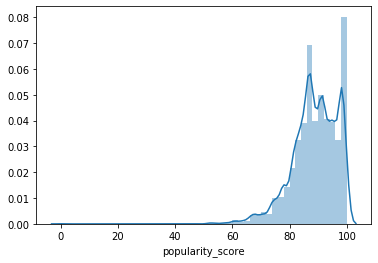

In [92]:
ax = sns.distplot(pop_score)


In [447]:
acousticness = df_master['acousticness']

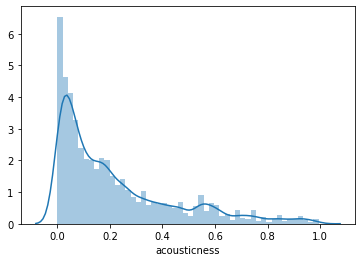

In [449]:
sns.distplot(acousticness)

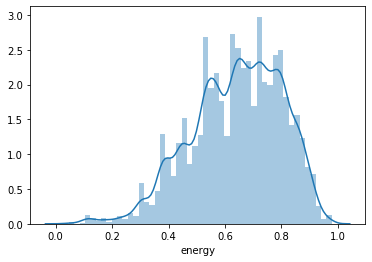

In [453]:
sns.distplot(df_master['energy'])


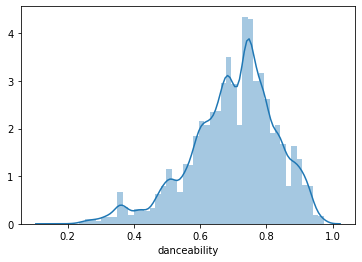

In [451]:
sns.distplot(df_master['danceability'])

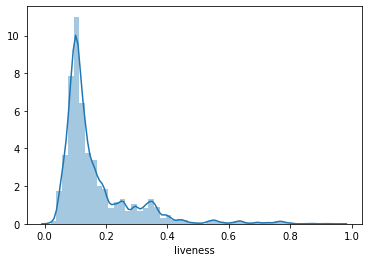

In [454]:
sns.distplot(df_master['liveness'])

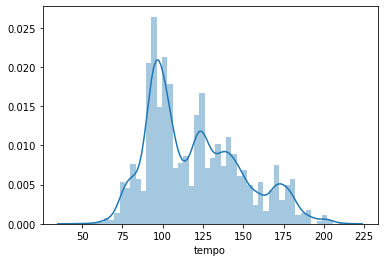

In [457]:
sns.distplot(df_master['tempo'])

In [484]:
df_unique.head()

,Unnamed: 0,id,week_of,chart_position,track_name,artist,num_of_streams,num_times,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,0,000xQL6tZNLJzIrtIgxqSl,36,57,Still Got Time,ZAYN,8368114,15,0.748,0.627,-6.029,0.064,0.131,0.0,0.085,0.524,120.963,188491,4.0
1,1,003eoIwxETJujVWmNFMoZy,11,155,Growing Pains,Alessia Cara,4358091,2,0.353,0.755,-6.276,0.733,0.082,0.0,0.390,0.437,191.153,193680,4.0
2,2,00B7TZ0Xawar6NZ00JFomN,87,140,Best Life (feat. Chance The Rapper),Cardi B,4743908,2,0.620,0.625,-7.438,0.553,0.287,0.0,0.314,0.665,167.911,284856,4.0
3,3,00EPIEnX1JFjff8sC6bccd,8,70,No Me Acuerdo,Thalía,7460620,16,0.836,0.799,-4.247,0.087,0.187,0.0,0.092,0.772,94.033,217653,4.0
4,4,00gpGR84M27moP7AFuqHIx,111,130,Bounce Out With That FT. YBN Nahmir,DJ A1,4913180,1,0.857,0.560,-8.278,0.173,0.043,0.0,0.153,0.482,94.949,91011,4.0


In [ ]:
df.get_dummies()
#creates dummy column as identifier

In [488]:
top_artists.sort_values('num_times', ascending = False)

,artist,num_times
2954,Ed Sheeran,153
2219,James Arthur,153
297,Ed Sheeran,144
2776,The Chainsmokers,142
2414,Ed Sheeran,138
...,...,...
2350,Sam Smith,1
2351,Post Malone,1
553,Harry Styles,1
2355,Calvin Harris,1


In [437]:
df_master[['num_of_streams', 'acousticness']]

,num_of_streams,acousticness
0,64275251,0.581
1,31104147,0.074
2,30924578,0.119
3,30879091,0.023
4,30048981,0.050
...,...,...
30990,4461128,0.009
30991,4460060,0.017
30992,4433481,0.257
30993,4430014,0.205


In [440]:
df_master['acousticness'].dropna()

0        0.581
1        0.074
2        0.119
3        0.023
4        0.050
         ...  
30990    0.009
30991    0.017
30992    0.257
30993    0.205
30994    0.281
Name: acousticness, Length: 30995, dtype: float64

In [435]:
#ANOVA
formula = 'num_of_streams ~ C(acousticness)'
lm = ols(formula, df_master[['num_of_streams','acousticness']]).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                       sum_sq       df          F  PR(>F)
C(acousticness)  1.984023e+17    729.0  10.105354     0.0
Residual         8.150953e+17  30265.0        NaN     NaN


In [96]:
df_unique.head()

,Unnamed: 0,id,week_of,chart_position,track_name,artist,num_of_streams,num_times,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
0,0,000xQL6tZNLJzIrtIgxqSl,36,57,Still Got Time,ZAYN,8368114,15,0.748,0.627,-6.029,0.064,0.131,0.0,0.085,0.524,120.963,188491,4.0
1,1,003eoIwxETJujVWmNFMoZy,11,155,Growing Pains,Alessia Cara,4358091,2,0.353,0.755,-6.276,0.733,0.082,0.0,0.390,0.437,191.153,193680,4.0
2,2,00B7TZ0Xawar6NZ00JFomN,87,140,Best Life (feat. Chance The Rapper),Cardi B,4743908,2,0.620,0.625,-7.438,0.553,0.287,0.0,0.314,0.665,167.911,284856,4.0
3,3,00EPIEnX1JFjff8sC6bccd,8,70,No Me Acuerdo,Thalía,7460620,16,0.836,0.799,-4.247,0.087,0.187,0.0,0.092,0.772,94.033,217653,4.0
4,4,00gpGR84M27moP7AFuqHIx,111,130,Bounce Out With That FT. YBN Nahmir,DJ A1,4913180,1,0.857,0.560,-8.278,0.173,0.043,0.0,0.153,0.482,94.949,91011,4.0


In [477]:
df_unique.sort_values('acousticness', ascending = False).head(15)

,Unnamed: 0,id,week_of,chart_position,track_name,artist,num_of_streams,num_times,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
1823,1823,4tHqQMWSqmL6YjXwsqthDI,16,123,Carol of the Bells,Mykola Dmytrovych Leontovych,7362398,6,0.418,0.106,-22.507,0.045,0.994,0.029,0.179,0.800,46.718,85267,4.0
322,322,0Uv5Kp8sEnriJjkX4oLfNI,8,127,Paul - Skit,Paul Rosenberg,5139520,2,0.636,0.335,-13.327,0.966,0.993,0.000,0.342,0.561,161.680,35240,4.0
1351,1351,3ITvHA9zhZZdBJsOsAUegF,2,116,Amorfoda,Bad Bunny,5573531,17,0.742,0.432,-7.539,0.062,0.984,0.000,0.080,0.252,148.005,155676,3.0
415,415,14JzyD6FlBD5z0wV5P07YI,5,51,when the party's over,Billie Eilish,9681823,23,0.498,0.104,-14.080,0.062,0.979,0.000,0.090,0.205,124.001,199931,3.0
842,842,299lFlaAsNQdgbIZNPmIA0,88,127,Christmas Time Is Here - Vocal,Vince Guaraldi Trio,5457722,1,0.388,0.145,-19.697,0.032,0.978,0.000,0.100,0.091,75.474,166387,3.0
1553,1553,43zdsphuZLzwA9k4DJhU0I,3,20,when the party's over,Billie Eilish,15201243,39,0.367,0.111,-14.084,0.097,0.978,0.000,0.090,0.198,82.642,196077,4.0
2353,2353,6B3zy3LOKHndqsviCr2z15,8,164,Em Calls Paul - Skit,Eminem,4351393,2,0.707,0.314,-10.115,0.747,0.977,0.000,0.109,0.602,104.014,49024,4.0
431,431,16x9bQHw8TBNaGDyULvwad,38,126,before I close my eyes,XXXTENTACION,5025420,1,0.356,0.143,-15.148,0.039,0.976,0.000,0.111,0.334,75.522,99658,4.0
1136,1136,2vQwlW8H1jFveGNXwZfJCV,135,129,Dead Inside (Interlude),XXXTENTACION,4496232,1,0.461,0.028,-21.992,0.041,0.973,0.002,0.169,0.354,88.388,86827,4.0
681,681,1SmiQ65iSAbPto6gPFlBYm,56,73,It’s Nice To Have A Friend,Taylor Swift,7780158,1,0.737,0.175,-9.912,0.040,0.971,0.000,0.171,0.545,70.008,150440,4.0


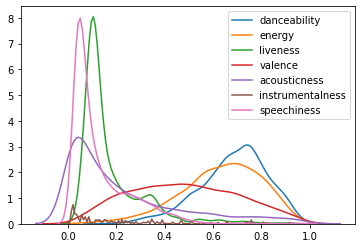

In [515]:
sns.kdeplot(df_unique['danceability'])
sns.kdeplot(df_unique['energy'])
sns.kdeplot(df_unique['liveness'])
sns.kdeplot(df_unique['valence'])
sns.kdeplot(df_unique['acousticness'])
sns.kdeplot(df_unique['instrumentalness'])
sns.kdeplot(df_unique['speechiness'])


In [98]:
top_ten = df_unique[df_unique['chart_position']<=10]

In [104]:
top_ten.sort_values('num_times', ascending = False).head(20)

,Unnamed: 0,id,week_of,chart_position,track_name,artist,num_of_streams,num_times,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature
2954,2954,7qiZfU4dY1lWllzX7mPBI3,0,1,Shape of You,Ed Sheeran,64275251,153,0.825,0.652,-3.183,0.080,0.581,0.000,0.093,0.931,95.977,233713,4.0
297,297,0tgVpDi06FyKpA1z0VMD4v,0,7,Perfect,Ed Sheeran,24795623,144,0.599,0.448,-6.312,0.023,0.163,0.000,0.106,0.168,95.050,263400,3.0
2580,2580,6RUKPb4LETWmmr3iAEQktW,0,5,Something Just Like This,The Chainsmokers,30048981,125,0.617,0.635,-6.769,0.032,0.050,0.000,0.164,0.446,103.019,247160,4.0
1089,1089,2RttW7RAu5nOAfq6YFvApB,0,10,Happier,Ed Sheeran,23574465,89,0.522,0.385,-7.355,0.029,0.536,0.000,0.135,0.236,89.792,207520,4.0
2810,2810,7dt6x5M1jzdTEt8oCbisTK,2,2,Better Now,Post Malone,32111555,87,0.680,0.578,-5.804,0.040,0.331,0.000,0.135,0.341,145.038,231267,4.0
1953,1953,58q2HKrzhC3ozto2nDdN4z,2,10,I Like It,Cardi B,18878956,74,0.816,0.726,-3.998,0.129,0.099,0.000,0.372,0.650,136.048,253390,4.0
1452,1452,3swc6WTsr7rl9DqQKQA55C,2,7,Psycho (feat. Ty Dolla $ign),Post Malone,23868633,71,0.750,0.560,-8.094,0.105,0.546,0.000,0.111,0.459,140.060,221440,4.0
2815,2815,7ef4DlsgrMEH11cDZd32M6,2,3,One Kiss (with Dua Lipa),Calvin Harris,28915990,70,0.791,0.862,-3.240,0.110,0.037,0.000,0.081,0.592,123.994,214847,4.0
61,61,08bNPGLD8AhKpnnERrAc6G,2,8,FRIENDS,Marshmello,20990336,67,0.626,0.880,-2.384,0.050,0.205,0.000,0.128,0.534,95.079,202621,4.0
1391,1391,3NdDpSvN911VPGivFlV5d0,0,6,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,25353217,65,0.735,0.451,-8.374,0.059,0.063,0.000,0.325,0.086,117.973,245200,4.0


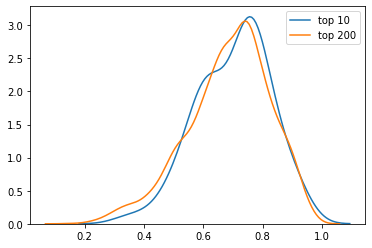

In [535]:
sns.kdeplot(top_ten['danceability'], label = 'top 10')
sns.kdeplot(df_unique['danceability'], label = 'top 200')


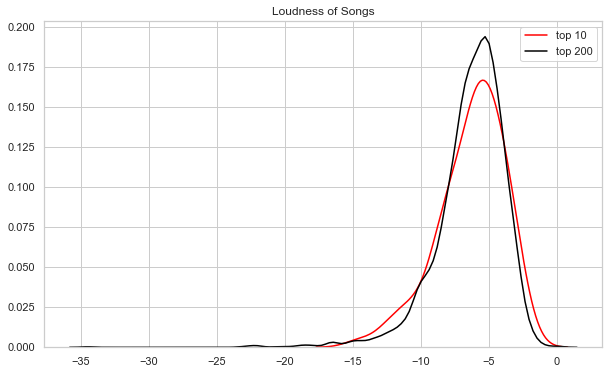

In [629]:
fig, ax = plt.subplots(figsize=[10,6])
sns.kdeplot(top_ten['loudness'], label = 'top 10', color = 'red')
sns.kdeplot(df_unique['loudness'], label = 'top 200', color = 'black')
plt.title('Loudness of Songs')
plt.show()

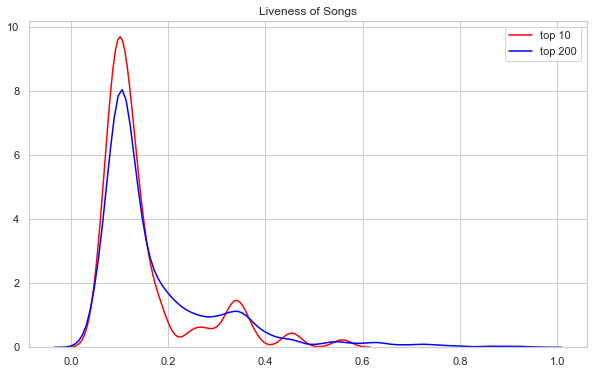

In [626]:
fig, ax = plt.subplots(figsize=[10,6])
sns.kdeplot(top_ten['liveness'], label = 'top 10', color = 'red')
sns.kdeplot(df_unique['liveness'], label = 'top 200', color = 'blue')
plt.title('Liveness of Songs')
plt.show()

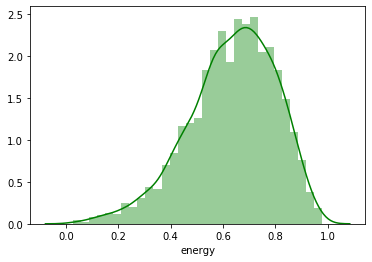

In [545]:

sns.distplot(df_unique['energy'], color="green")
plt.title 

In [577]:
top_ten['liveness'].std(), df_unique['liveness'].std()

(0.10110372509350708, 0.13269716532580722)

In [ ]:
yerr = [top_ten['liveness'].std(), df_unique['liveness'].std()]

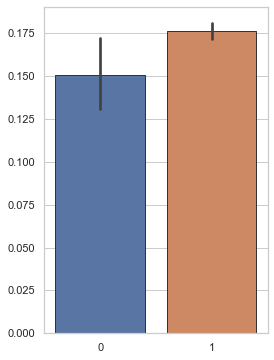

In [596]:
df_bar = [top_ten['liveness'], df_unique['liveness']]

fig, ax = plt.subplots(1,1,figsize=[4,6])
sns.barplot(data=df_bar, ax=ax, lw=1, edgecolor=".2", ci = 95) # SEM errorbars
plt.show()

In [ ]:
df_bar = [top_ten['liveness'], df_unique['liveness']]

fig, ax = plt.subplots(1,1,figsize=[4,6])
sns.barplot(data=df_bar, ax=ax,capsize=.15, lw=1, edgecolor=".2", ci=95) # SEM errorbars
plt.show()

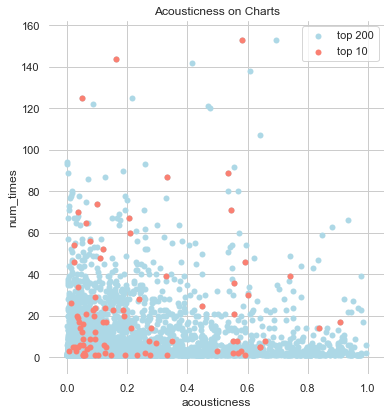

In [105]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x= df_unique['acousticness'], y = df_unique['num_times'],
                sizes=(1, 8), linewidth=0,
                 ax=ax, color = 'lightblue', label = 'top 200')
                    
sns.scatterplot(x= top_ten['acousticness'], y = top_ten['num_times'],
                sizes=(1, 8), linewidth=0,
                 ax=ax, color = 'salmon', label = 'top 10')                    
plt.title('Acousticness on Charts')
plt.show()

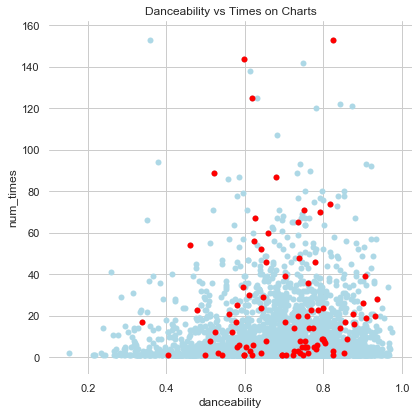

In [621]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x= df_unique['danceability'], y = df_unique['num_times'],
                sizes=(1, 8), linewidth=0,
                 ax=ax, color = 'lightblue')
                    
sns.scatterplot(x= top_ten['danceability'], y = top_ten['num_times'],
                sizes=(1, 8), linewidth=0,
                 ax=ax, color = 'red')                    
plt.title('Danceability vs Times on Charts')
plt.show()

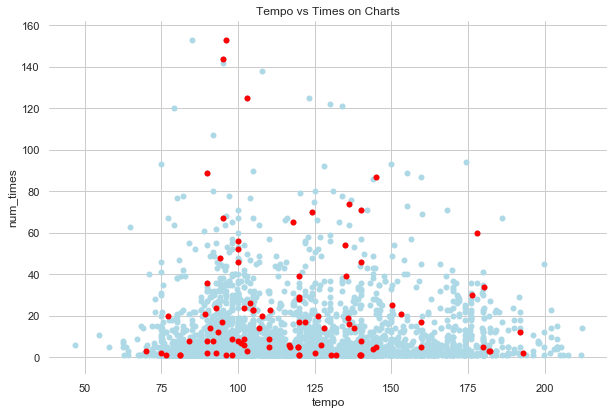

In [634]:
sns.set(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 6.5))
sns.despine(f, left=True, bottom=True)

sns.scatterplot(x= df_unique['tempo'], y = df_unique['num_times'],
                sizes=(1, 8), linewidth=0,
                 ax=ax, color = 'lightblue')
                    
sns.scatterplot(x= top_ten['tempo'], y = top_ten['num_times'],
                sizes=(1, 8), linewidth=0,
                 ax=ax, color = 'red')                    
plt.title('Tempo vs Times on Charts')
plt.show()

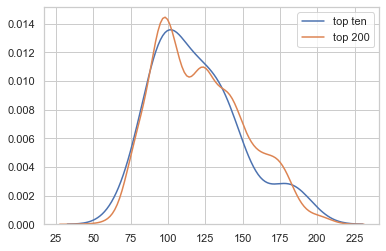

In [639]:
sns.kdeplot(top_ten['tempo'], label = 'top ten')
sns.kdeplot(df_unique['tempo'], label = 'top 200')


In [529]:
top_live_mean = top_ten['liveness'].mean()

In [531]:
top_live_std = top_ten['liveness'].std()


In [618]:
tempo_10 = top_ten['tempo']
unique_tempo = df_unique['tempo']

In [619]:
tempo_10.mean()

119.06032584269664

In [633]:
stats.ttest_1samp(top_ten['acousticness'], df_unique['acousticness'].mean())

Ttest_1sampResult(statistic=0.482601584482359, pvalue=0.6305769979326019)